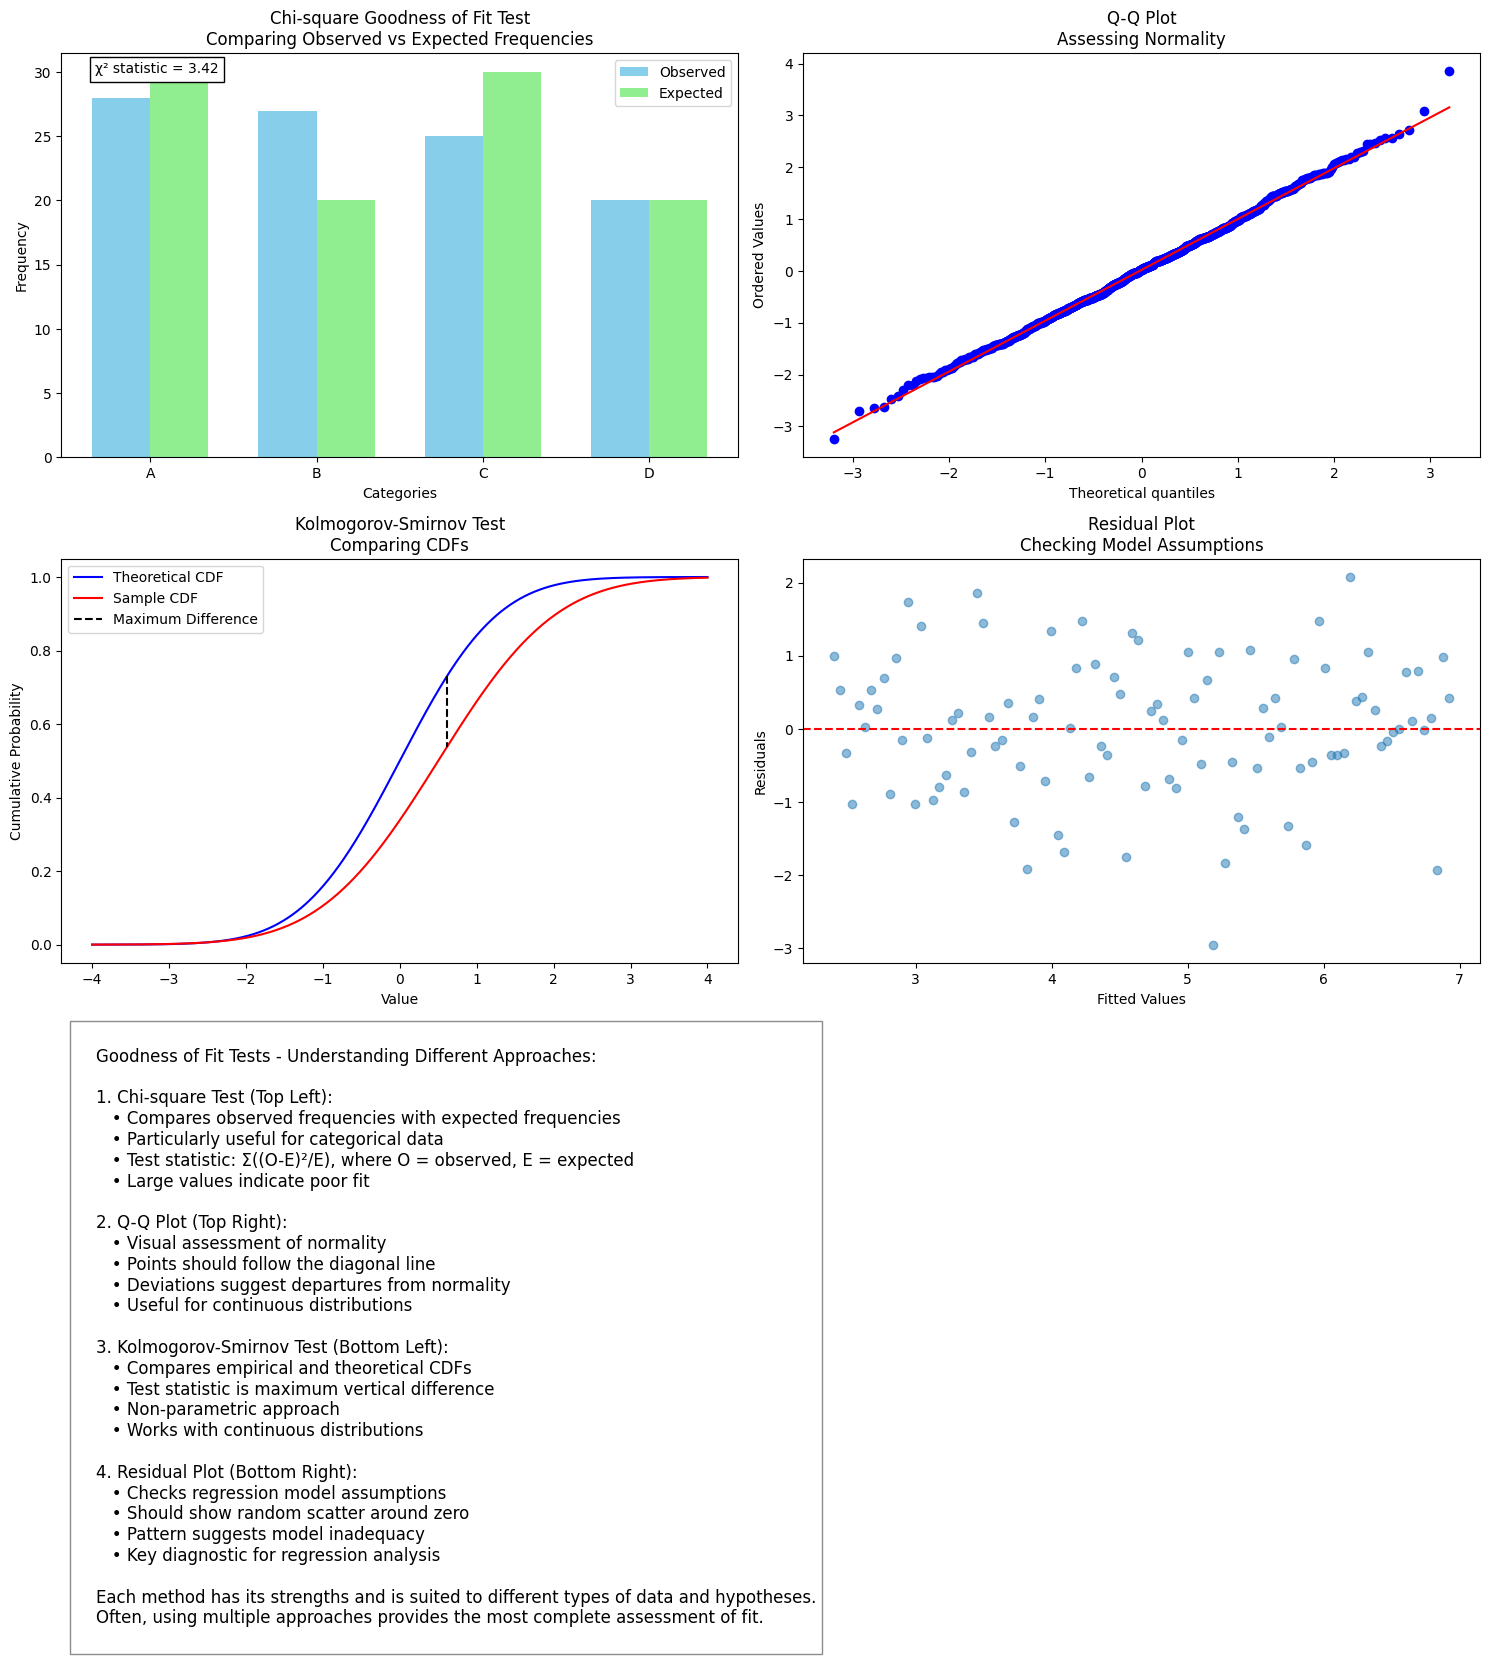

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

def plot_goodness_of_fit_examples():
    """
    Creates educational visualizations for different types of goodness of fit tests
    """
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(15, 18))
    gs = fig.add_gridspec(3, 2, height_ratios=[3, 3, 1])
    ax1 = fig.add_subplot(gs[0, 0])  # Chi-square test
    ax2 = fig.add_subplot(gs[0, 1])  # QQ plot
    ax3 = fig.add_subplot(gs[1, 0])  # KS test
    ax4 = fig.add_subplot(gs[1, 1])  # Residual plot
    ax_text = fig.add_subplot(gs[2, :])  # Explanatory text
    
    # 1. Chi-square Goodness of Fit Test
    # Generate categorical data
    categories = ['A', 'B', 'C', 'D']
    expected_prob = [0.3, 0.2, 0.3, 0.2]
    n_samples = 100
    np.random.seed(42)
    observed = np.random.multinomial(n_samples, expected_prob)
    expected = np.array(expected_prob) * n_samples
    
    # Plot observed vs expected frequencies
    x = np.arange(len(categories))
    width = 0.35
    ax1.bar(x - width/2, observed, width, label='Observed', color='skyblue')
    ax1.bar(x + width/2, expected, width, label='Expected', color='lightgreen')
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories)
    ax1.set_title('Chi-square Goodness of Fit Test\nComparing Observed vs Expected Frequencies')
    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    
    # Calculate chi-square statistic
    chi2_stat = np.sum((observed - expected)**2 / expected)
    ax1.text(0.05, 0.95, f'χ² statistic = {chi2_stat:.2f}', 
             transform=ax1.transAxes, bbox=dict(facecolor='white'))
    
    # 2. Q-Q Plot
    # Generate sample data
    np.random.seed(42)
    sample_data = np.random.normal(0, 1, 1000)
    
    # Create Q-Q plot
    stats.probplot(sample_data, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot\nAssessing Normality')
    
    # 3. Kolmogorov-Smirnov Test
    # Generate two distributions
    x_ks = np.linspace(-4, 4, 1000)
    cdf1 = stats.norm.cdf(x_ks, 0, 1)
    cdf2 = stats.norm.cdf(x_ks, 0.5, 1.2)
    
    # Plot CDFs
    ax3.plot(x_ks, cdf1, 'b-', label='Theoretical CDF')
    ax3.plot(x_ks, cdf2, 'r-', label='Sample CDF')
    ax3.set_title('Kolmogorov-Smirnov Test\nComparing CDFs')
    ax3.set_xlabel('Value')
    ax3.set_ylabel('Cumulative Probability')
    ax3.legend()
    
    # Show maximum difference
    max_diff_idx = np.argmax(np.abs(cdf1 - cdf2))
    ax3.plot([x_ks[max_diff_idx], x_ks[max_diff_idx]], 
             [cdf1[max_diff_idx], cdf2[max_diff_idx]], 
             'k--', label='Maximum Difference')
    ax3.legend()
    
    # 4. Residual Plot
    # Generate sample data
    X = np.linspace(0, 10, 100)
    y = 2 + 0.5 * X + np.random.normal(0, 1, 100)
    
    # Fit linear model
    coeffs = np.polyfit(X, y, 1)
    y_pred = np.polyval(coeffs, X)
    residuals = y - y_pred
    
    # Plot residuals
    ax4.scatter(y_pred, residuals, alpha=0.5)
    ax4.axhline(y=0, color='r', linestyle='--')
    ax4.set_title('Residual Plot\nChecking Model Assumptions')
    ax4.set_xlabel('Fitted Values')
    ax4.set_ylabel('Residuals')
    
    # Add educational text
    explanation = """
    Goodness of Fit Tests - Understanding Different Approaches:
    
    1. Chi-square Test (Top Left):
       • Compares observed frequencies with expected frequencies
       • Particularly useful for categorical data
       • Test statistic: Σ((O-E)²/E), where O = observed, E = expected
       • Large values indicate poor fit
    
    2. Q-Q Plot (Top Right):
       • Visual assessment of normality
       • Points should follow the diagonal line
       • Deviations suggest departures from normality
       • Useful for continuous distributions
    
    3. Kolmogorov-Smirnov Test (Bottom Left):
       • Compares empirical and theoretical CDFs
       • Test statistic is maximum vertical difference
       • Non-parametric approach
       • Works with continuous distributions
    
    4. Residual Plot (Bottom Right):
       • Checks regression model assumptions
       • Should show random scatter around zero
       • Pattern suggests model inadequacy
       • Key diagnostic for regression analysis
    
    Each method has its strengths and is suited to different types of data and hypotheses.
    Often, using multiple approaches provides the most complete assessment of fit.
    """
    ax_text.axis('off')
    ax_text.text(0.01, -3.3, explanation, fontsize=12,
                bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    
    plt.tight_layout()
    return fig

# Generate visualization
fig = plot_goodness_of_fit_examples()
plt.show()


## What is a Contingency Table?

Think of a contingency table like a special kind of spreadsheet that helps us see if two characteristics are related. Let's use a real-world example:
Imagine you own a coffee shop and want to know if the time of day (Morning, Afternoon, Evening) affects what type of coffee people order (Regular, Latte, Espresso).

Time    | Regular | Latte | Espresso | Total
--------|---------|--------|----------|-------
Morning |    45   |   30   |    25    |  100
Afternoon|   40   |   45   |    15    |  100
Evening |    30   |   35   |    35    |  100
--------|---------|--------|----------|-------
Total   |   115   |   110  |    75    |  300

We want to answer: "Does the time of day influence what coffee people order?" Or in statistical terms: "Are these variables independent?"

Let's break this down step by step.

**Understanding Independence**

If time of day and coffee choice are independent, it means:

- The proportion of people ordering each type of coffee should be roughly the same regardless of the time of day
- Any differences we see are just due to chance

In [29]:

from scipy.stats import chi2_contingency

# Create a contingency table of customer age groups and product preferences
data = np.array([
    [45, 30, 25],  # Young customers
    [40, 45, 15],  # Middle-aged customers
    [30, 35, 35]   # Older customers
])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(data)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 14.23
p-value: 0.0066
Degrees of freedom: 4


In [28]:

def calculate_expected(data):
    """
    Calculate expected frequencies assuming independence
    
    Parameters:
    data: observed frequencies (numpy array)
    
    Returns:
    expected frequencies (numpy array)
    """
    # Get row and column totals
    row_totals = data.sum(axis=1)  # Sum across columns
    col_totals = data.sum(axis=0)  # Sum across rows
    total = data.sum()             # Total sample size
    
    # For each cell, calculate (row_total × column_total) / grand_total
    row_matrix = row_totals.reshape(-1, 1)  # Make column vector
    expected = np.outer(row_matrix, col_totals) / total
    
    return expected

# Our coffee shop data
observed = np.array([
    [45, 30, 25],  # Morning
    [40, 45, 15],  # Afternoon
    [30, 35, 35]   # Evening
])

expected = calculate_expected(observed)
print("Expected frequencies if independent:")
print(pd.DataFrame(expected, 
                  index=['Morning', 'Afternoon', 'Evening'],
                  columns=['Regular', 'Latte', 'Espresso']))

Expected frequencies if independent:
             Regular      Latte  Espresso
Morning    38.333333  36.666667      25.0
Afternoon  38.333333  36.666667      25.0
Evening    38.333333  36.666667      25.0


In [25]:
def calculate_chi_square(observed, expected):
    """
    Calculate chi-square statistic
    """
    return np.sum((observed - expected)**2 / expected)

chi_square = calculate_chi_square(observed, expected)
chi_square

14.225296442687748

In [26]:
from scipy.stats import chi2

def test_independence(observed, alpha=0.05):
    """
    Test for independence in contingency table
    
    Parameters:
    observed: observed frequencies
    alpha: significance level
    
    Returns:
    Dictionary with test results
    """
    # Calculate expected frequencies
    expected = calculate_expected(observed)
    
    # Calculate chi-square statistic
    chi_square = calculate_chi_square(observed, expected)
    
    # Calculate degrees of freedom
    rows, cols = observed.shape
    df = (rows-1) * (cols-1)
    
    # Calculate p-value
    p_value = 1 - chi2.cdf(chi_square, df)
    
    # Get critical value
    critical_value = chi2.ppf(1-alpha, df)
    
    return {
        'chi_square': chi_square,
        'degrees_of_freedom': df,
        'p_value': p_value,
        'critical_value': critical_value,
        'reject_null': p_value < alpha
    }

# Test our coffee shop data
results = test_independence(observed)

In [27]:
results

{'chi_square': 14.225296442687748,
 'degrees_of_freedom': 4,
 'p_value': 0.006609654678650823,
 'critical_value': 9.487729036781154,
 'reject_null': True}


If we reject the null hypothesis (p-value $< 0.05$), it means:

- Time of day and coffee choice are related
- This could help with:

  - Inventory management
  - Staffing decisions
  - Marketing strategies